## K-NEAREST NEIGHBOURS

### Tasks:
1. Analyse the data using the visualizations
2. Preprocess the data by handling missing values & Outliers, if any.
3. Split the dataset into training and testing sets (80% training, 20% testing).
4. Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset
5. Choose an appropriate distance metric and value for K.
6. Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.
7. Visualize the decision boundaries of the classifier.


In [35]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Dataset
zoo_df = pd.read_csv("Zoo.csv")
zoo_df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
zoo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


### *1. Exploratory Data Analysis*

In [4]:
# check for missing values
zoo_df.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [5]:
# count for the values of all variables in zoo

for col in zoo_df.columns:
  print(f'Column {col}: {zoo_df[col].value_counts()}')

Column animal name: animal name
frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: count, Length: 100, dtype: int64
Column hair: hair
0    58
1    43
Name: count, dtype: int64
Column feathers: feathers
0    81
1    20
Name: count, dtype: int64
Column eggs: eggs
1    59
0    42
Name: count, dtype: int64
Column milk: milk
0    60
1    41
Name: count, dtype: int64
Column airborne: airborne
0    77
1    24
Name: count, dtype: int64
Column aquatic: aquatic
0    65
1    36
Name: count, dtype: int64
Column predator: predator
1    56
0    45
Name: count, dtype: int64
Column toothed: toothed
1    61
0    40
Name: count, dtype: int64
Column backbone: backbone
1    83
0    18
Name: count, dtype: int64
Column breathes: breathes
1    80
0    21
Name: count, dtype: int64
Column venomous: venomous
0    93
1     8
Name: count, dtype: int64
Column fins: fins
0    84
1    17
Name: count, dtype: i

In [6]:
# drop animal name
zoo_df.drop(columns = ['animal name'], inplace = True)
zoo_df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [7]:
# Statistical Summary
zoo_df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [8]:
zoo_df.shape

(101, 17)

### *2. Data Visualization*

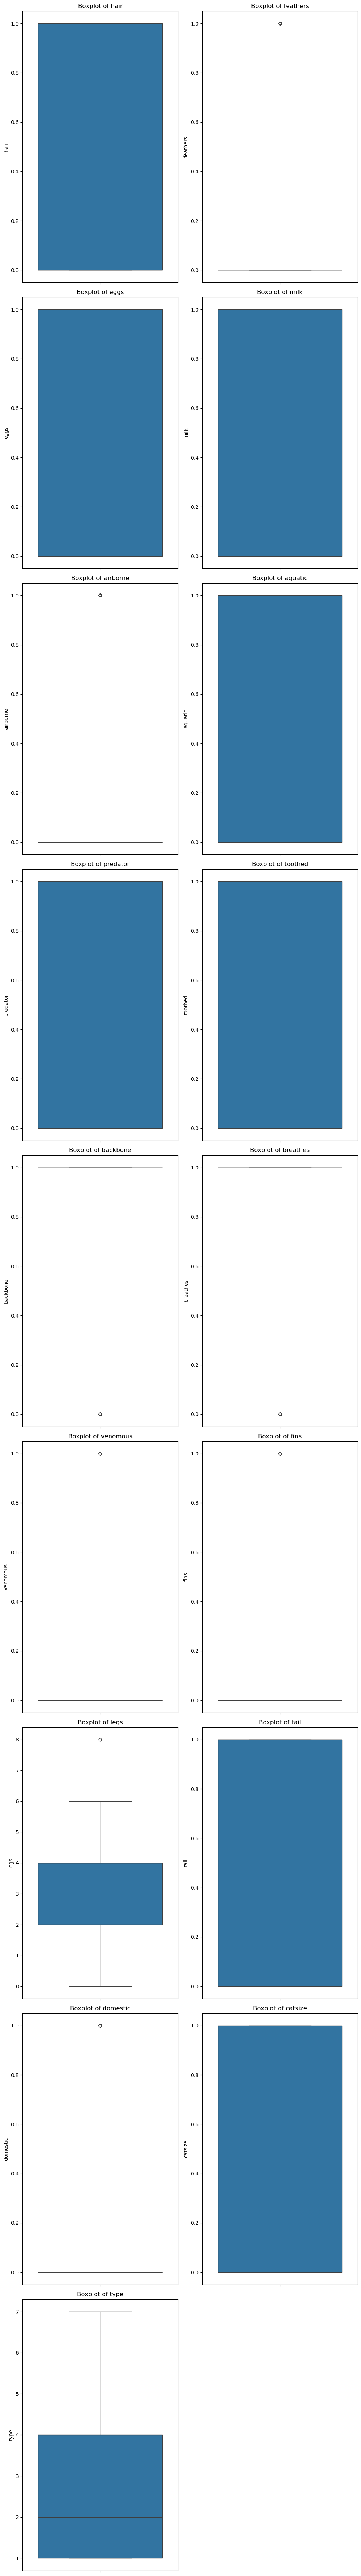

In [19]:
# Boxplot
plt.figure(figsize = (10,400))
for i, col in enumerate(zoo_df.columns):
    plt.subplot(51, 2, i+1)
    sns.boxplot(y = zoo_df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

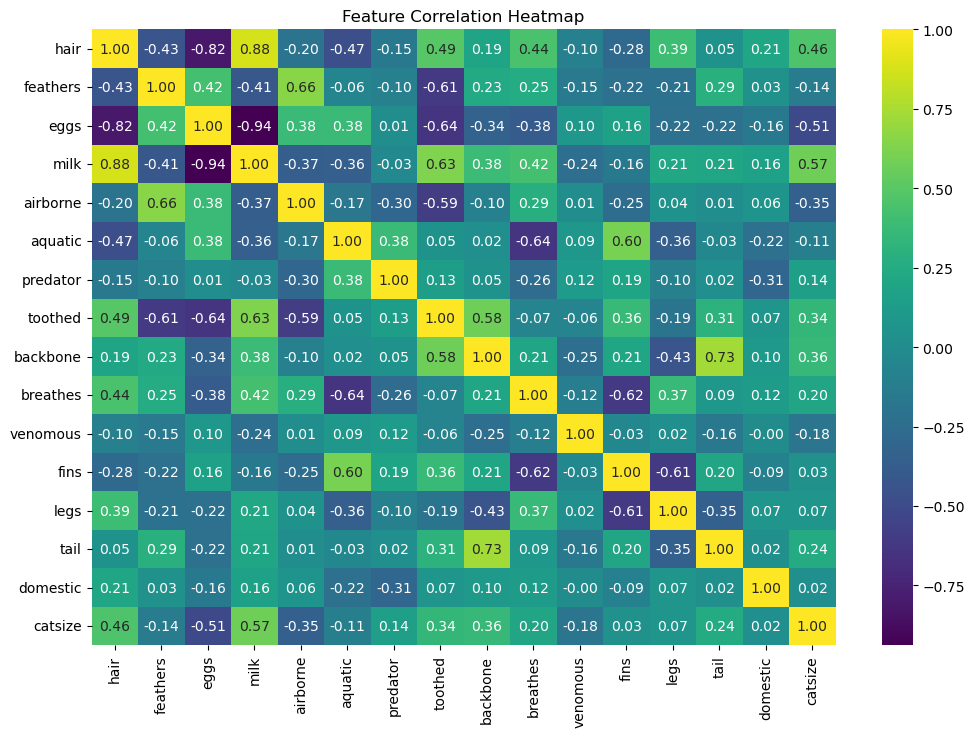

In [20]:
# Correlation heatmap
plt.figure(figsize = (12,8))
sns.heatmap(zoo_df.drop(columns = ['type']).corr(),
            annot = True,
            cmap = 'viridis',
            fmt = '.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

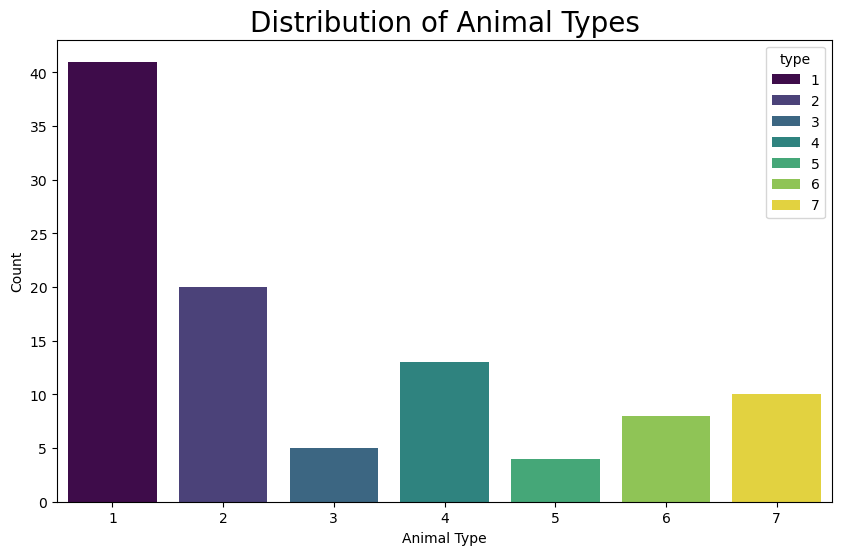

In [22]:
# Countplot of target variable -- 'Type'
plt.figure(figsize = (10,6))
sns.countplot(data = zoo_df, x = 'type', hue = 'type', palette = 'viridis', legend = True)
plt.title("Distribution of Animal Types", size = 20)
plt.xlabel("Animal Type")
plt.ylabel("Count")
plt.show()

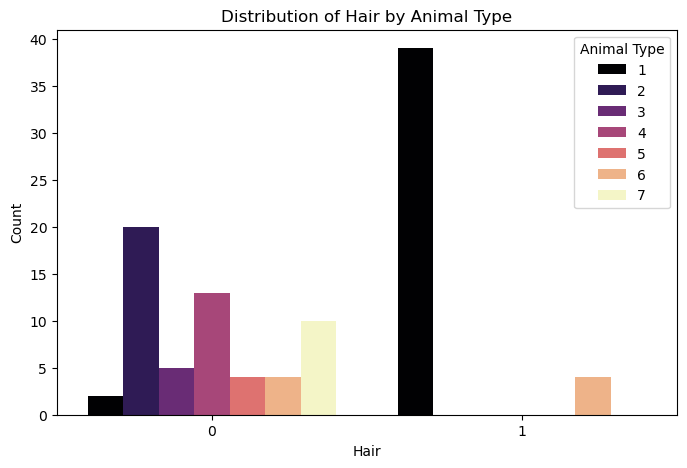

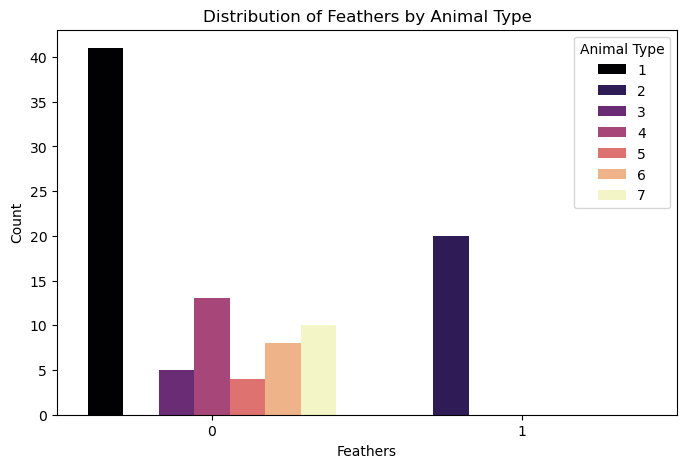

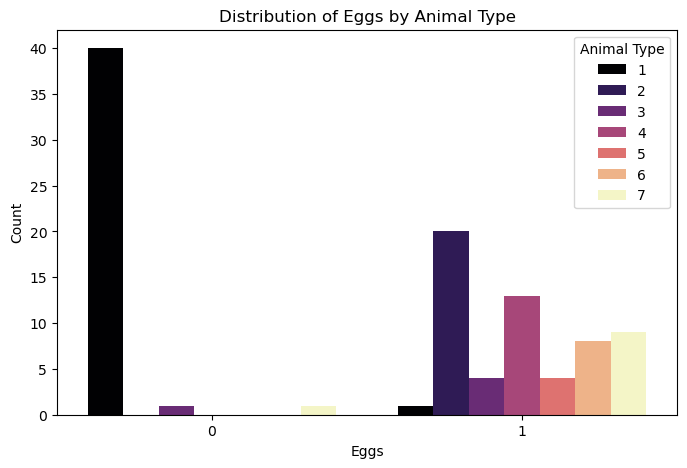

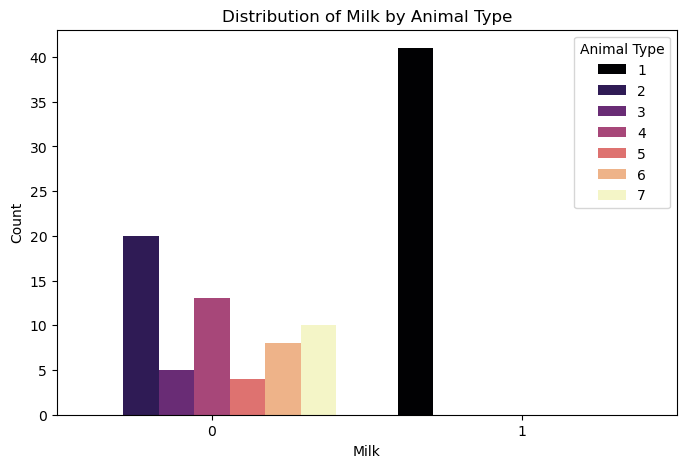

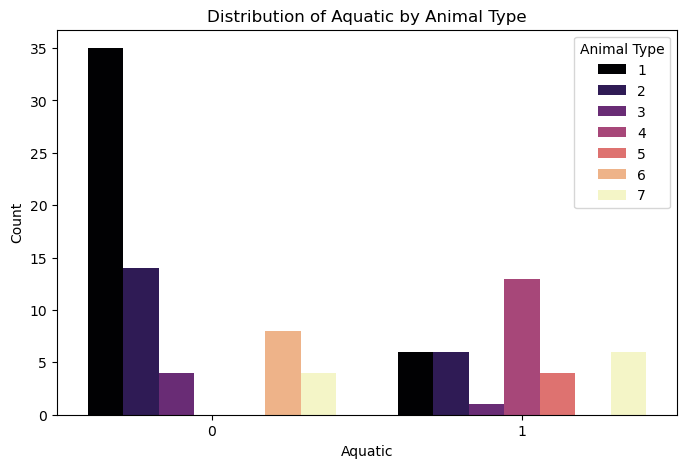

In [24]:
# Bar plot for categorical features distribution
categorical_features = ['hair', 'feathers', 'eggs', 'milk', 'aquatic']
for feature in categorical_features:
    plt.figure(figsize = (8, 5))
    sns.countplot(data = zoo_df, x = feature, hue = 'type', palette = 'magma')
    plt.title(f'Distribution of {feature.capitalize()} by Animal Type')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')
    plt.legend(title = 'Animal Type')
    plt.show()

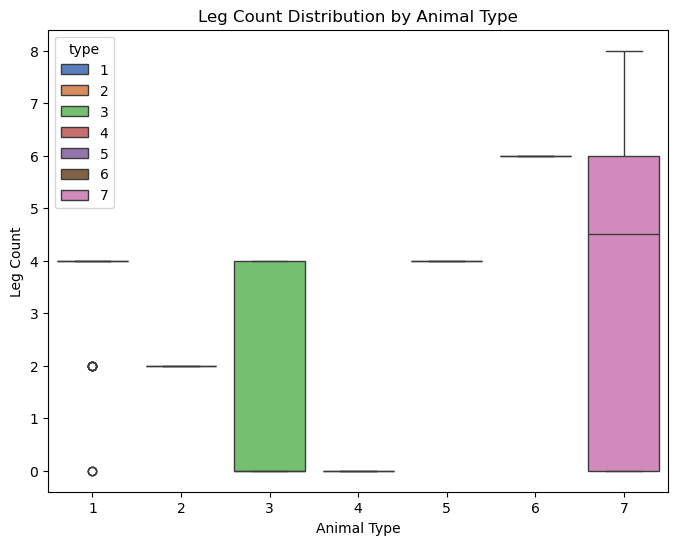

In [25]:
# Boxplot for numerical feature: legs
plt.figure(figsize = (8, 6))
sns.boxplot(data = zoo_df, x = 'type',hue = 'type', y = 'legs', palette = 'muted')
plt.title('Leg Count Distribution by Animal Type')
plt.xlabel('Animal Type')
plt.ylabel('Leg Count')
plt.show()

### *3. Data Preprocessing*

In [26]:
# apply label encoding to legs variable
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
zoo_df['legs'] = LE.fit_transform(zoo_df['legs'])
zoo_df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,2,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,2,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,2,1,0,1,1


In [27]:
zoo_df['legs'].value_counts()

legs
2    38
1    27
0    23
4    10
5     2
3     1
Name: count, dtype: int64

In [28]:
# Defin X and Y
X = zoo_df.drop(columns = ['type'])
Y = zoo_df['type']

In [30]:
# Standardizing features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### *4. Data Transformation and Model Fitting*

In [62]:
# Data Partition
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.2, random_state = 24)

In [63]:
# Model Fitting
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [64]:
# Predictr and Evaluate
from sklearn.metrics import classification_report, confusion_matrix
y_pred_test = knn.predict(X_test)
y_pred_train = knn.predict(X_train)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[3 0 0 0 0 0 0]
 [0 7 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 0 0 0 0 2 0]
 [0 1 1 1 1 2 0]]

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       0.88      1.00      0.93         7
           3       0.00      0.00      0.00         0
           4       0.50      1.00      0.67         1
           5       0.50      0.50      0.50         2
           6       0.50      1.00      0.67         2
           7       0.00      0.00      0.00         6

    accuracy                           0.67        21
   macro avg       0.48      0.64      0.54        21
weighted avg       0.55      0.67      0.60        21



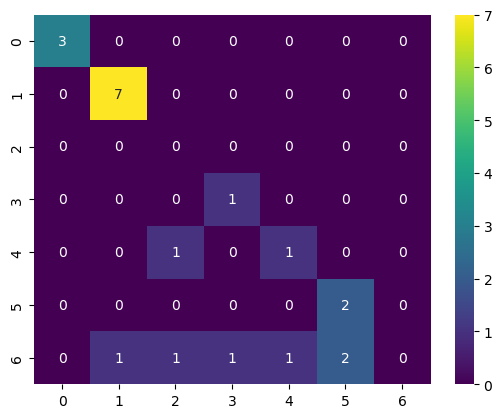

In [65]:
# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, cmap = 'viridis')
plt.show()

In [66]:
# get training and test accuracy
from sklearn.metrics import accuracy_score
training_score = accuracy_score(y_train, y_pred_train)
print("traning accuracy score:", np.round(training_score,2))

test_score = accuracy_score(y_test,y_pred_test)
print("test accuracy score:", np.round(test_score,2))

traning accuracy score: 0.95
test accuracy score: 0.76


In [67]:
# Visualize decision boundary (using PCA to 2D)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_train_pca, X_test_pca = train_test_split(X_pca, test_size=0.2, random_state=42)

knn_pca = KNeighborsClassifier(n_neighbors = 5)
knn_pca.fit(X_train_pca, y_train)

KNeighborsClassifier()

In [68]:
# Create mesh grid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

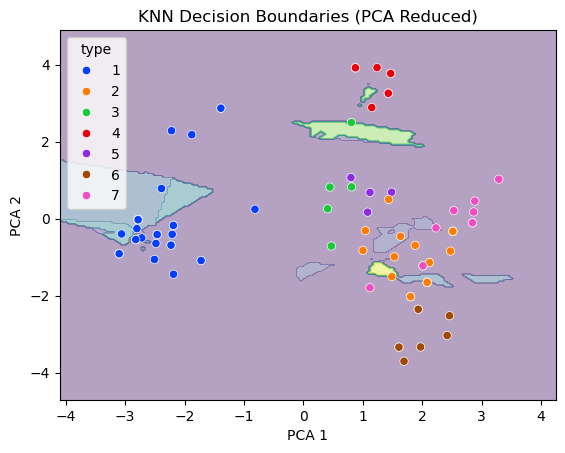

In [69]:
plt.contourf(xx, yy, Z, alpha = 0.4)
sns.scatterplot(x = X_pca[:, 0], y = X_pca[:, 1], hue = Y, palette = 'bright')
plt.title("KNN Decision Boundaries (PCA Reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

In [70]:
n_neighbors =  np.array([2*i+1 for i in range(0,20)])  
param_grid = dict(n_neighbors = n_neighbors)   
param_grid

{'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
        35, 37, 39])}

In [71]:
n_neighbors

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39])

In [72]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
grid = GridSearchCV(estimator = KNeighborsClassifier(),
                    param_grid = param_grid)
grid.fit(X,Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39])})

In [73]:
grid.best_score_

0.96

In [74]:
grid.best_params_

{'n_neighbors': 1}

In [75]:
# search for an optimal value of K for KNN
# range of k we wnat to try
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
KF = KFold(n_splits = 10)
k_range = range(1,41)

# empty list to store scores
k_scores = []

# loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors = k)
    #3. Obtain cross_val_score for KNeighborsClassifier with k neighbors
    scores = cross_val_score(knn, X, Y, cv = KF, scoring = 'accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
# k_scores = grid.best_scores_
pd.Series(k_scores).sort_values(ascending = False)

0     0.960000
2     0.940000
1     0.940000
3     0.930000
4     0.930000
5     0.900000
6     0.850000
7     0.810000
8     0.810000
9     0.800000
10    0.800000
15    0.790000
19    0.790000
18    0.790000
17    0.790000
20    0.790000
13    0.790000
12    0.790000
11    0.790000
14    0.790000
16    0.780000
21    0.770000
22    0.740000
26    0.730000
29    0.730000
27    0.730000
28    0.730000
25    0.720000
24    0.720000
23    0.720000
30    0.720000
31    0.720000
32    0.700909
33    0.672727
34    0.672727
35    0.632727
36    0.612727
37    0.612727
38    0.602727
39    0.592727
dtype: float64

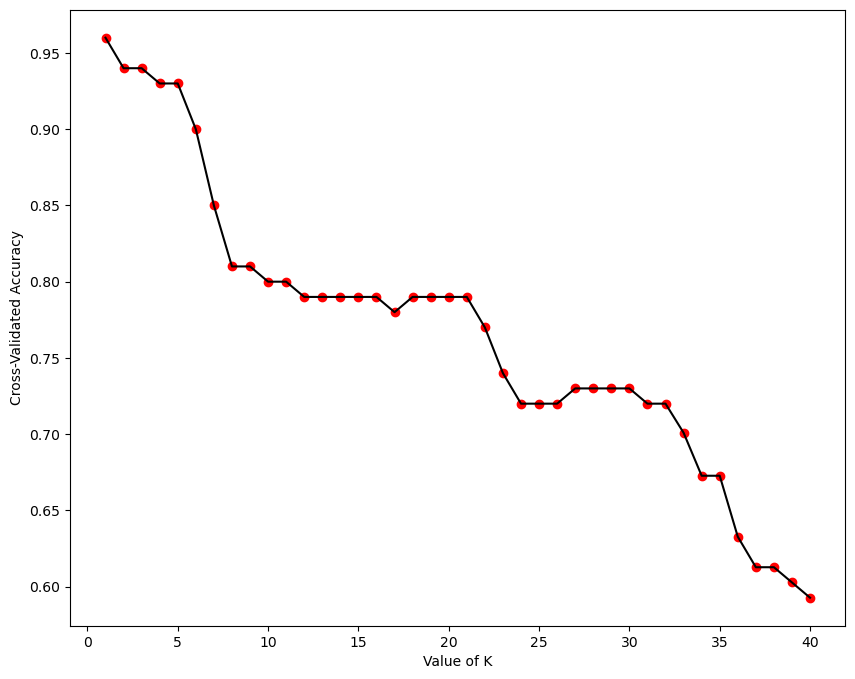

In [76]:
import matplotlib.pyplot as plt
# plot to see clearly
plt.figure(figsize = (10, 8))
plt.plot(k_range, k_scores, color = 'black')
plt.scatter(k_range, k_scores, color = 'red')
plt.xlabel('Value of K')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [78]:
# K-value with cross validation

train_acc_list = []
test_acc_list = []

for k in range(5, 18, 2):
    train_acc = []
    test_acc = []

    for i in range(1, 200, 1):
        X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.2, random_state = i)
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_train, Y_train)
        y_pred_train =  knn.predict(X_train)
        y_pred_test = knn.predict(X_test)
        train_acc.append(accuracy_score(Y_train, y_pred_train))
        test_acc.append(accuracy_score(Y_test, y_pred_test))

    train_acc_list.append(np.mean(train_acc).round(2))
    test_acc_list.append(np.mean(test_acc).round(2))

print("Training Accuracies:", train_acc_list)
print("Testing Accuracies:", test_acc_list)

Training Accuracies: [0.97, 0.94, 0.92, 0.9, 0.88, 0.87, 0.86]
Testing Accuracies: [0.92, 0.89, 0.87, 0.85, 0.84, 0.83, 0.82]


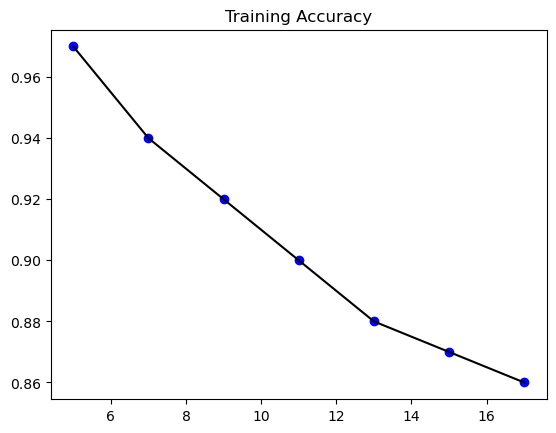

In [81]:
# Visualising the Results
import matplotlib.pyplot as plt
plt.scatter(range(5, 18, 2), train_acc_list, color = 'blue')
plt.plot(range(5,18, 2), train_acc_list, color = 'black')
plt.title("Training Accuracy")
plt.show()

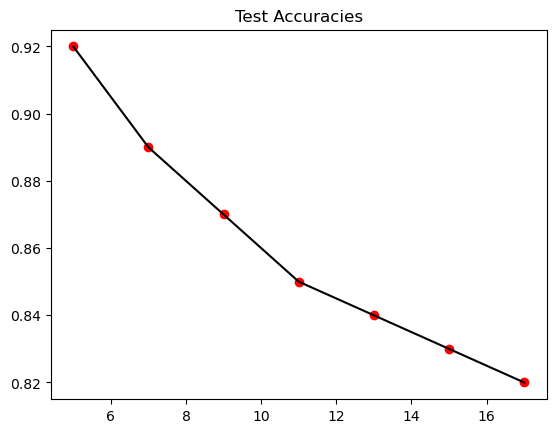

In [82]:
plt.scatter(range(5, 18, 2), test_acc_list, color = 'red')
plt.plot(range(5,18, 2), test_acc_list, color = 'black')
plt.title("Test Accuracies")
plt.show()

### INTERVIEW QUESTIONS

### *1. What are the key hyperparameters in KNN?*

The key hyperparameters in KNN are:

* **n_neighbors (K):**
  
This determines the number of nearest neighbors to consider when making a prediction. Choosing an optimal value for K is crucial—too small can lead to overfitting, and too large can cause underfitting.

* **weights:**
This defines how the neighbors contribute to the prediction. Common options are:

    'uniform': all neighbors have equal weight
    
    'distance': closer neighbors have more influence on the prediction.

* **metric:**
Specifies the distance function used to measure similarity. The most common is *'minkowski'*, which can generalize both Euclidean and Manhattan distances.

* **p:**
This is the power parameter for the Minkowski distance.

    - p = 1 corresponds to Manhattan distance
        
    - p = 2 corresponds to Euclidean distance

* **algorithm:**
Determines how the nearest neighbors are computed. Options include *'auto', 'ball_tree', 'kd_tree'*, and *'brute'*. It can affect performance but not accuracy.

* **leaf_size:**
This is relevant when using tree-based algorithms and impacts speed and memory usage.

*2. What distance metrics can be used in KNN?*
KNN relies on a distance metric to identify the "nearest" neighbors. Common distance metrics include:

**1. Euclidean Distance:**

The straight-line distance between two points in Euclidean space. It’s the default and most commonly used metric when p = 2.

**2. Manhattan Distance:**

Also known as L1 distance, it sums the absolute differences across dimensions. It’s suitable when p = 1.

**3. Minkowski Distance:**

A generalized form that includes both Euclidean and Manhattan distances based on the value of p.

**4. Chebyshev Distance:**

Takes the maximum absolute difference between dimensions. It's useful when movement is only allowed in certain directions.

**5. Cosine Similarity:**

Measures the cosine of the angle between two vectors. It's often used in text classification but not a true metric in mathematical terms.

**6. Hamming Distance:**

Measures the number of positions at which the corresponding elements differ. It’s ideal for categorical or binary data.